<a href="https://colab.research.google.com/github/NandaSimatupang/halo/blob/main/depan_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os


In [ ]:
dataset_dir = 'gigi_depan/'

In [ ]:
class_labels = ['Bukan Gigi', 'Gigi berlubang','Gigi Sehat', 'Perubahan Warna Gigi','Radang Gusi']

In [ ]:
import os
files = os.listdir(dataset_dir)
print(files)

['Bukan Gigi', 'Gigi Berlubang', 'Gigi Sehat', 'Perubahan Warna Gigi', 'Radang Gusi']


In [ ]:
# Initialize an empty list to store the image files
image_files = []

# Iterate over the subdirectories
for subdir in os.listdir(dataset_dir):
    subdir_path = os.path.join(dataset_dir, subdir)
    for file in os.listdir(subdir_path):
        if file.endswith(('.jpg', '.jpeg', '.png')):
            image_files.append(os.path.join(subdir_path, file))

# Split the image files into training and testing sets
train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=class_labels,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=class_labels,
    subset='validation'
)

Found 5418 images belonging to 5 classes.
Found 2319 images belonging to 5 classes.


In [ ]:

# Define the CNN model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    callbacks=[early_stopping]
)

Epoch 1/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 82s 479ms/step - accuracy: 0.8930 - loss: 0.3026 - val_accuracy: 0.6441 - val_loss: 1.1483
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.9062 - loss: 0.2702 - val_accuracy: 0.7333 - val_loss: 0.6427
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 80s 468ms/step - accuracy: 0.8970 - loss: 0.2762 - val_accuracy: 0.6424 - val_loss: 1.3370
Epoch 4/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.9062 - loss: 0.3126 - val_accuracy: 0.8000 - val_loss: 0.6392
Epoch 5/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 80s 469ms/step - accuracy: 0.9351 - loss: 0.1782 - val_accuracy: 0.6285 - val_loss: 1.5530
Epoch 6/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 0.9062 - loss: 0.2278 - val_accuracy: 0.8000 - val_loss: 1.1882
Epoch 7/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 81s 472ms/step - accuracy: 0.9540 - loss: 0.1433 - val_accuracy: 0.6280 - val_loss: 1.5081


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc:.2f}')

73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - accuracy: 0.6265 - loss: 1.5686
Test accuracy: 0.63


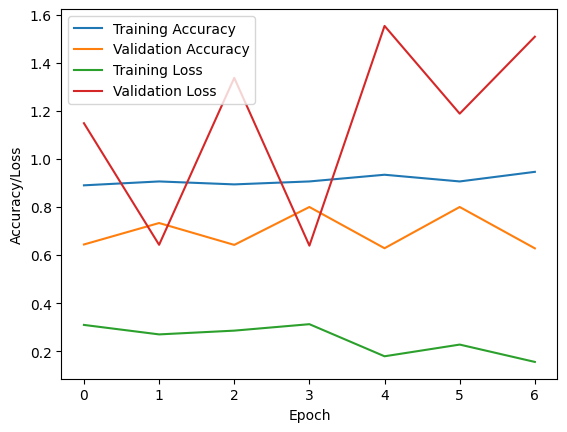

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

In [ ]:
# Save the model
model.save('depan_CNN.h5')

### Testing Model

In [ ]:
import numpy as np
from PIL import Image

In [ ]:
#load model
from tensorflow.keras.models import load_model
model = load_model('tampak_depan.h5')

In [ ]:
test_image= 'gigi berlubang.jpeg'
img = Image.open(test_image)
img = img.resize((224, 224))
img = np.array(img) / 255.0
# Add a batch dimension to the image
img = np.expand_dims(img, axis=0)

# Make predictions on the image
predictions = model.predict(img)

# Get the class probabilities
class_probabilities = predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [ ]:
# Get the class with the highest probability
classes = ['Bukan Gigi', 'Gigi berlubang', 'Gigi Sehat', 'Perubahan Warna Gigi', 'Radang Gusi']
class_index = np.argmax(class_probabilities)
class_name = classes[class_index]
print(f'Predicted class: {class_name}')
print(f'Class probability: {class_probabilities[class_index]:.2f}')

Predicted class: Gigi berlubang
Class probability: 0.54
